パッケージ

jupyter nbconvert --to python tdss.ipynb
で.pyに変換

In [2]:
import pandas as pd
import numpy as np
import random as rnd
import math

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
combine=[train_df,test_df]


In [6]:
print(train_df.columns.values)
train_df.describe()

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train_df.tail(n=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [38]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bazzani, Miss. Albina",male,1601,B96 B98,S
freq,1,577,7,4,644


In [47]:
train_df[["Pclass","Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [7]:
train_df[["Sex","Survived"]].groupby(["Sex"]).mean()
train_df[["Sex","Survived","Age"]].groupby(["Sex"]).mean()

,Survived,Age
Sex,,
female,0.742038,27.915709
male,0.188908,30.726645


In [51]:
train_df[["SibSp","Survived"]].groupby(["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [52]:
train_df[["Parch","Survived"]].groupby(["Parch"]).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


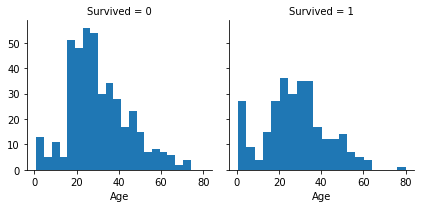

In [54]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)

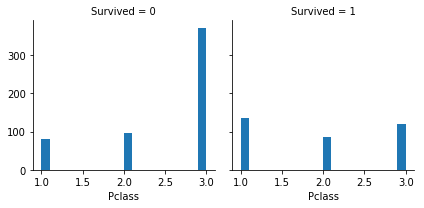

In [63]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Pclass",bins=20)

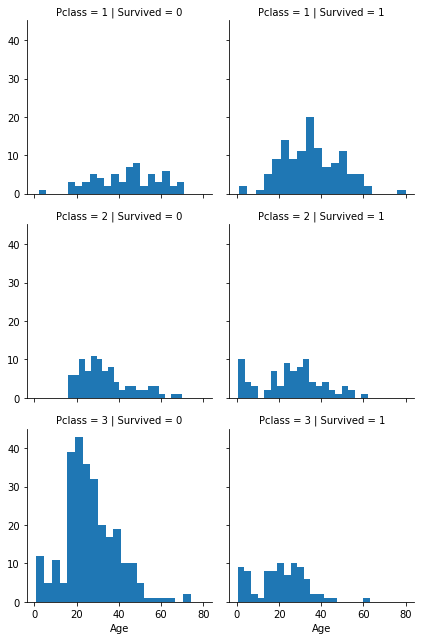

In [62]:
grid=sns.FacetGrid(train_df,col="Survived",row="Pclass")
grid.map(plt.hist,"Age",bins=20)

C:\Users\miyak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\miyak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\miyak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


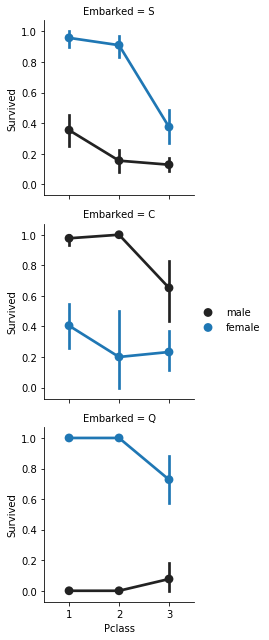

In [68]:
grid=sns.FacetGrid(train_df,row="Embarked")
grid.map(sns.pointplot,"Pclass","Survived","Sex")
grid.add_legend()

C:\Users\miyak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\miyak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


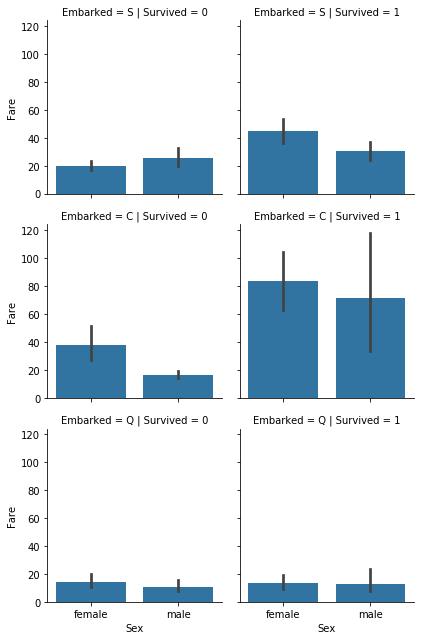

In [69]:
grid=sns.FacetGrid(train_df,row="Embarked",col="Survived")
grid.map(sns.barplot,"Sex","Fare")

In [8]:
train_df=train_df.drop(["Ticket","Cabin"],axis=1)
test_df=test_df.drop(["Ticket","Cabin"],axis=1)
combine=[train_df,test_df]
print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

After (891, 10) (418, 9) (891, 10) (418, 9)


In [111]:
train_df["Name"].describe()
train_df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [9]:
for dataset in combine:
    dataset["Title"]=dataset.Name.str.extract("([A-Za-z]+)\.",expand=False)

#dataset["Title"]
#print(train_df)
pd.crosstab(combine[0]["Title"],combine[0]["Sex"])
train_df["Title"].describe()

count     891
unique     17
top        Mr
freq      517
Name: Title, dtype: object

In [10]:
print(combine[0]["Title"].unique())
print(type(combine[0]["Title"].unique()))
print((combine[1]["Title"].unique()))
raretitle=np.delete(combine[0]["Title"].unique(),[0,1,2,3],0)
raretitle=np.insert(raretitle,0,"Dona")
print(raretitle)




['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
<class 'numpy.ndarray'>
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']
['Dona' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady' 'Sir' 'Mlle' 'Col'
 'Capt' 'Countess' 'Jonkheer']


In [11]:
for dataset in combine:
    dataset["Title"]=dataset["Title"].replace(raretitle,"Rare")
combine[0][["Title","Survived"]].groupby(["Title"]).mean()

,Survived
Title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Rare,0.444444


In [116]:
print(combine[0].isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Fare           False
Embarked        True
Title          False
dtype: bool


In [12]:
#print(combine[0][combine[0]["Age"].isnull()])
#print(combine[0][combine[0]["Age"].isnull()].loc[:,"Agena"])
for dataset in combine:
    dataset["Agena"]=0
    for i in dataset.index:
        #print(i)
        #if dataset.at[i,"Age"].isnull():
        if math.isnan(dataset.at[i,"Age"]):
            dataset.at[i,"Agena"]=1
    
train_df["Agena"].describe()

count    891.000000
mean       0.198653
std        0.399210
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Agena, dtype: float64

In [134]:
train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [13]:
for dataset in combine:
    dataset.fillna({"Embarked":"S","Age":dataset["Age"].median(),"Fare":dataset["Fare"].mean()},inplace=True)
    print(dataset.isnull().any())

print(train_df.isnull().any())
train_df.describe()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
Agena          False
dtype: bool
PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
Agena          False
dtype: bool
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
Agena          False
dtype: bool


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Agena
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.198653
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.399210
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [14]:
print(type(train_df.at[0,"Sex"]))
#print(train_df.info())
print(type(combine))
    

<class 'str'>
<class 'list'>


In [15]:
dummylist=[]
numlist=[]
for i in train_df.columns:
    print(type(train_df.at[0,i]))
    if type(train_df.at[0,i])==str:
        print(i)
        dummylist.append(i)
    else:
        numlist.append(i)
dummylist.remove("Name")
print(dummylist)
test_df['Survived']=np.nan
combine1=[]
for dataset in combine:
    #print(pd.get_dummies(dataset[dummylist],drop_first=True,dummy_na=False,columns=None))
    d1=pd.concat([dataset[numlist],pd.get_dummies(dataset[dummylist],drop_first=True,dummy_na=False,columns=None)],axis=1)
    combine1.append(d1)

print(dataset.describe())
print(train_df.describe())
print(combine1[1].describe())
train_df1=combine1[0]
test_df1=combine1[1]

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
Name
<class 'str'>
Sex
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'str'>
Embarked
<class 'str'>
Title
<class 'numpy.int64'>
['Sex', 'Embarked', 'Title']
       PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550   29.599282    0.447368    0.392344   
std     120.810458    0.841838   12.703770    0.896760    0.981429   
min     892.000000    1.000000    0.170000    0.000000    0.000000   
25%     996.250000    1.000000   23.000000    0.000000    0.000000   
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   
75%    1204.750000    3.000000   35.750000    1.000000    0.000000   
max    1309.000000    3.000000   76.000000    8.000000    9.000000   

             Fare       Agena  Survived  
count  418.000000  418.000000       0.

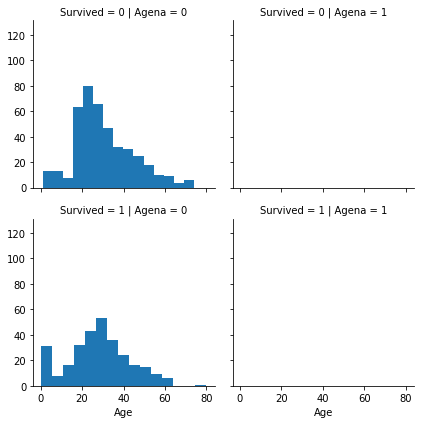

In [16]:
grid=sns.FacetGrid(train_df1,row="Survived",col="Agena")
grid.map(plt.hist,"Age",bins=15)

In [222]:
print(min(train_df1["Age"]))
print(train_df1[train_df1["Age"]<=5].describe())
print(train_df1[(train_df1["Age"]<=10) & (train_df1["Age"]>5)].describe())
print(train_df1[(train_df1["Age"]<=15) & (train_df1["Age"]>10)].describe())

0.42
       PassengerId   Survived     Pclass        Age      SibSp      Parch  \
count    44.000000  44.000000  44.000000  44.000000  44.000000  44.000000   
mean    410.954545   0.704545   2.568182   2.503864   1.704545   1.363636   
std     279.364391   0.461522   0.624974   1.439669   1.503168   0.532258   
min       8.000000   0.000000   1.000000   0.420000   0.000000   0.000000   
25%     181.250000   0.000000   2.000000   1.000000   1.000000   1.000000   
50%     378.500000   1.000000   3.000000   2.000000   1.000000   1.000000   
75%     656.750000   1.000000   3.000000   4.000000   3.000000   2.000000   
max     870.000000   1.000000   3.000000   5.000000   5.000000   2.000000   

             Fare  Agena   Sex_male  Embarked_Q  Embarked_S  Title_Miss  \
count   44.000000   44.0  44.000000   44.000000   44.000000   44.000000   
mean    31.528030    0.0   0.522727    0.045455    0.772727    0.477273   
std     29.434829    0.0   0.505258    0.210707    0.423915    0.505258   
m

In [17]:
for dataset in combine1:
    dataset["Agebin"]=15
    for i in range(15):
        dataset.loc[(dataset["Age"]<=5*(i+1)) & (dataset["Age"]>5*i),"Agebin"]=i

print(dataset["Agebin"].describe())
print(train_df1["Agebin"].describe())
print(test_df1["Agebin"].describe())

count    418.000000
mean       5.368421
std        2.500486
min        0.000000
25%        4.000000
50%        5.000000
75%        6.750000
max       15.000000
Name: Agebin, dtype: float64
count    891.000000
mean       5.273850
std        2.592812
min        0.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       15.000000
Name: Agebin, dtype: float64
count    418.000000
mean       5.368421
std        2.500486
min        0.000000
25%        4.000000
50%        5.000000
75%        6.750000
max       15.000000
Name: Agebin, dtype: float64


In [227]:
train_df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Agena,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Agebin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.198653,0.647587,0.086420,0.725028,0.204265,0.580247,0.140292,0.030303,5.273850
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.399210,0.477990,0.281141,0.446751,0.403390,0.493796,0.347485,0.171516,2.592812
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


<class 'seaborn.axisgrid.PairGrid'>


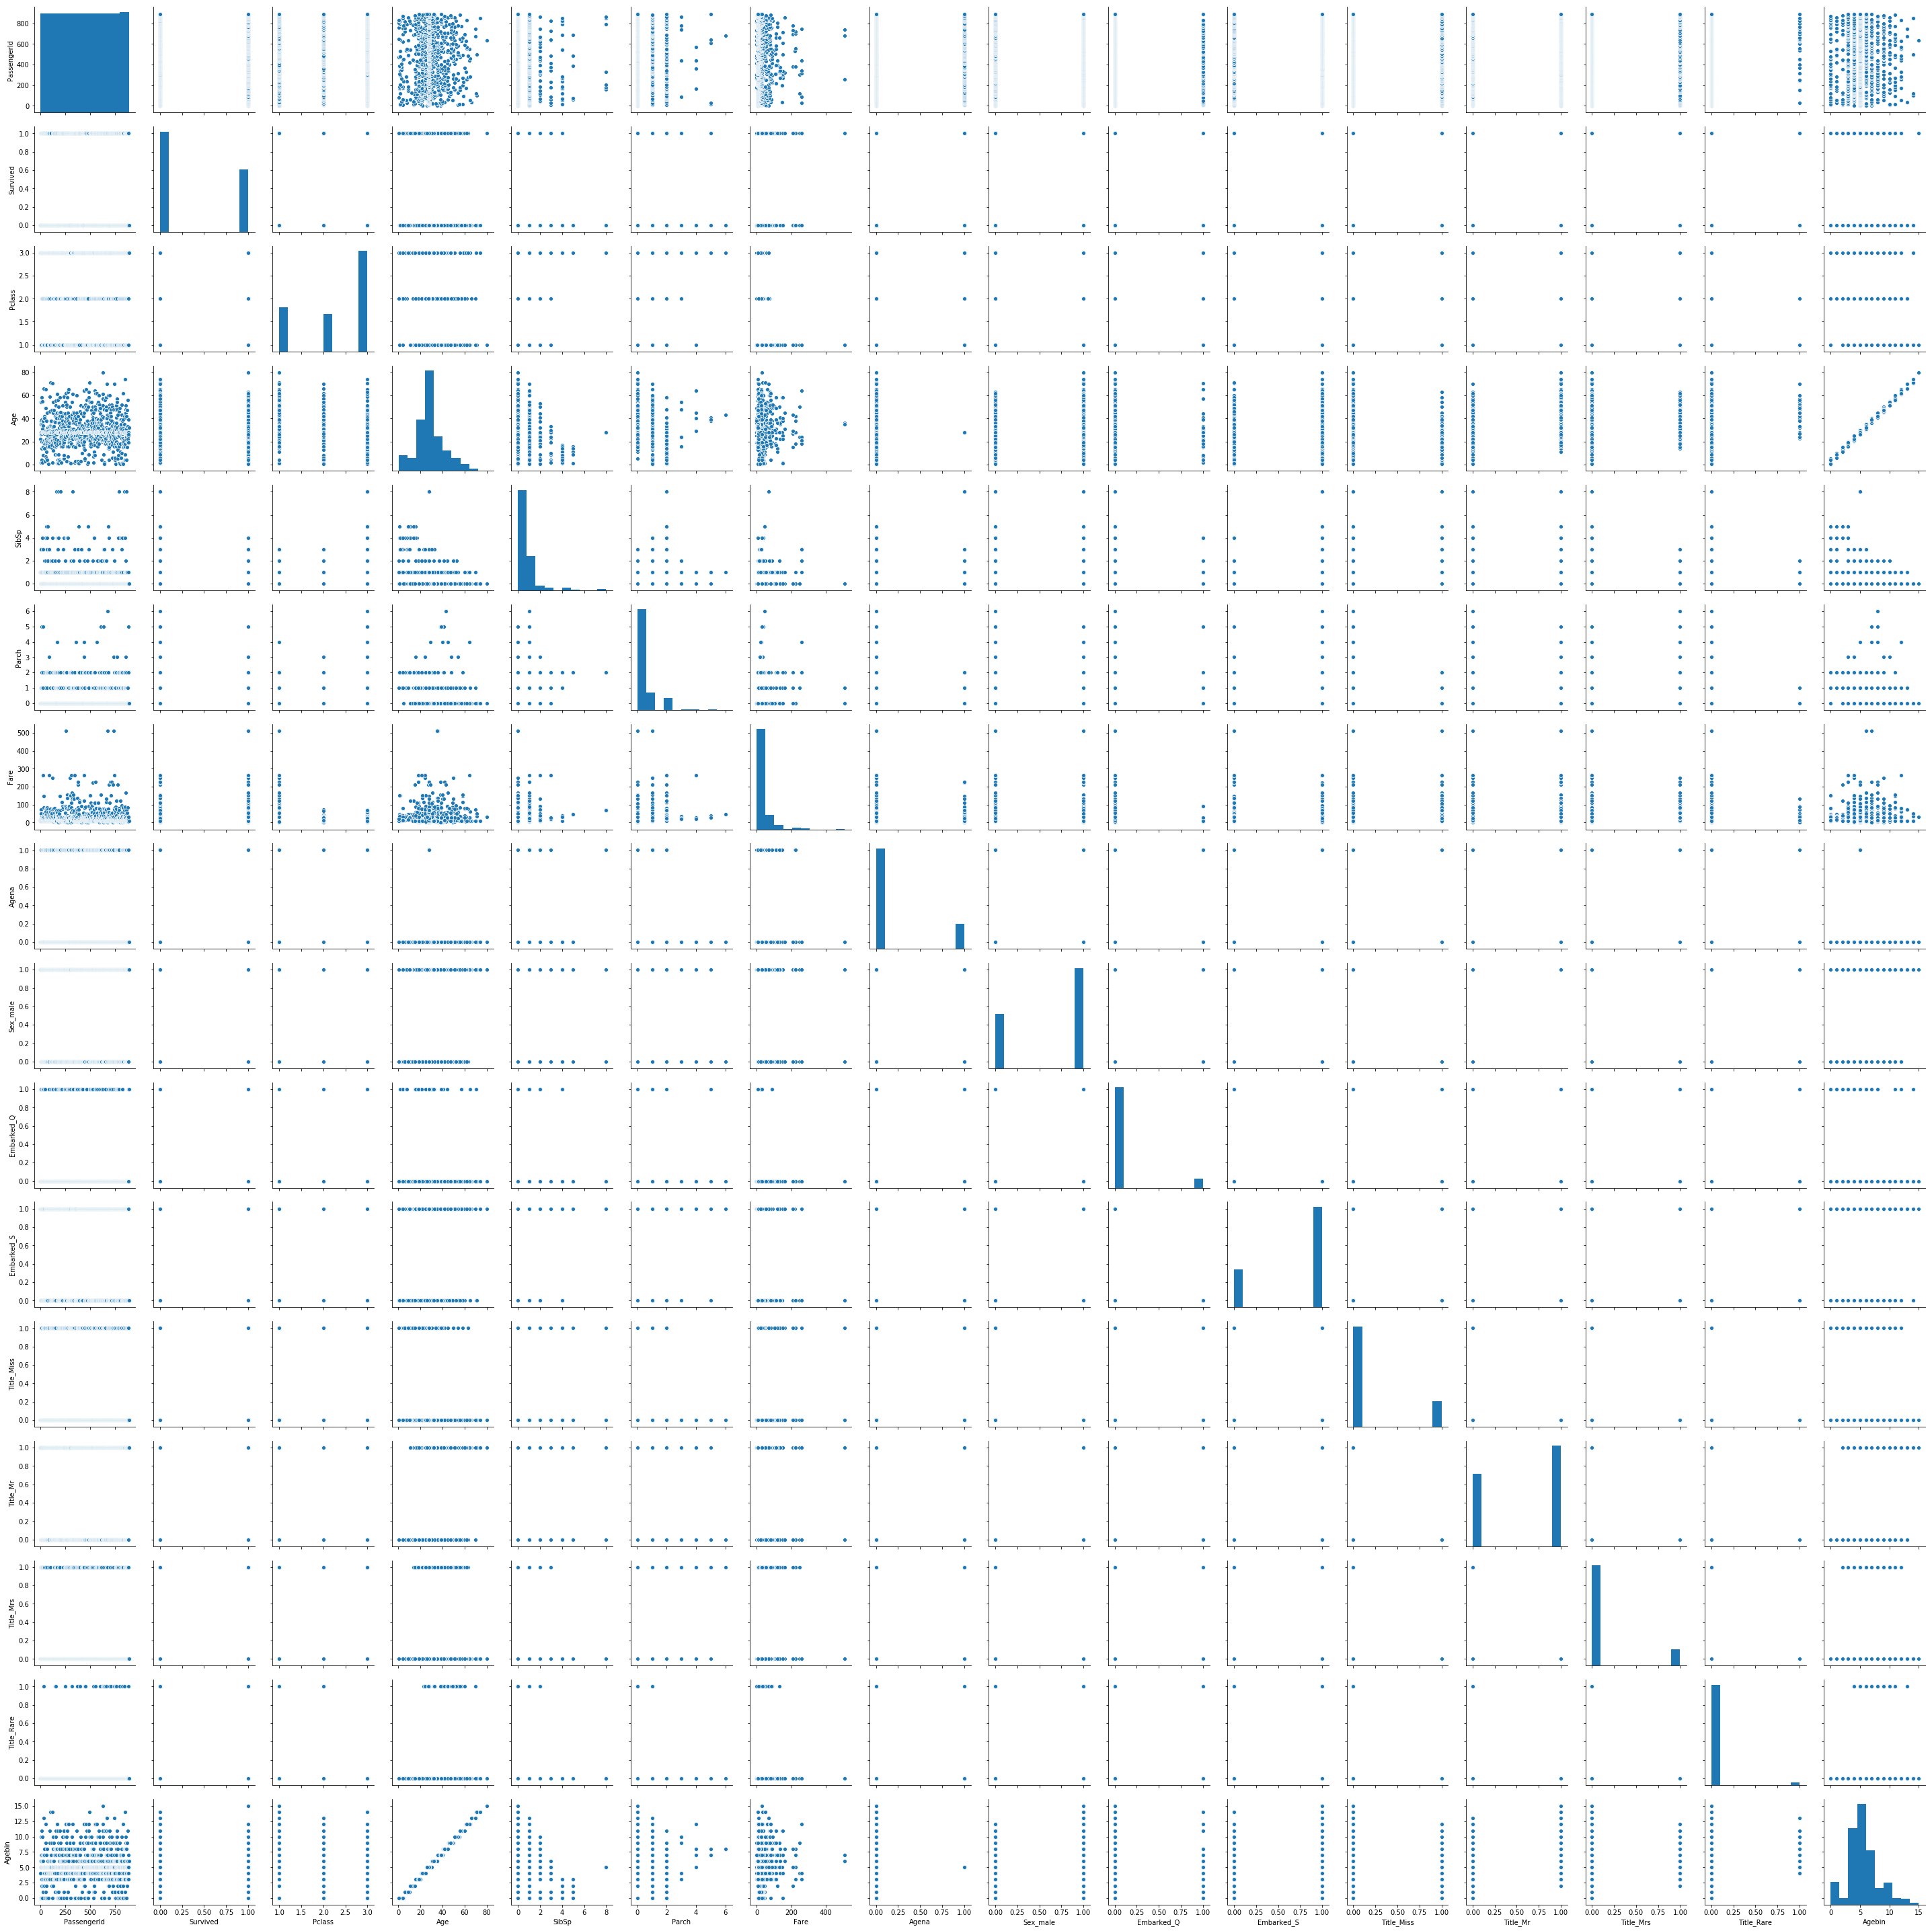

In [228]:
pg=sns.pairplot(train_df1)
print(type(pg))

In [18]:
for dataset in combine1:
    dataset["Family"]=dataset["SibSp"]+dataset["Parch"]
    dataset["alone"]=0
    dataset.loc[dataset["Family"]==0,"alone"]=1
    dataset["logage"]=np.log(dataset["Age"]+1)
    
print(train_df1.describe())
print(test_df1.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare       Agena    Sex_male  Embarked_Q  Embarked_S  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.381594   32.204208    0.198653    0.647587    0.086420    0.725028   
std      0.806057   49.693429    0.399210    0.477990    0.281141    0.446751   
min      0.000000    0.000000    0.000000    

ここからモデルに　長かったしよくわからなかった…

In [23]:
x_train_full=train_df1.drop(["Survived","PassengerId"],axis=1)
t_train_full=train_df1["Survived"]
#x_test=test_df1.drop(["Survived","PassengerId"],axis=1)
#x_train.shape,y_train.shape,x_test.shape

In [24]:
x_train,x_test,t_train,t_test=train_test_split(train_df1.drop(["Survived","PassengerId"],axis=1),train_df1["Survived"],test_size=0.2)
evaldata=test_df1.drop(["Survived","PassengerId"],axis=1)
x_train.shape,x_test.shape,t_train.shape,t_test.shape,evaldata.shape

((712, 17), (179, 17), (712,), (179,), (418, 17))

ロジスティック回帰　とりあえずやってみるけどパラメータなどよくわからん

In [25]:
ss=preprocessing.StandardScaler()
x_train_sc=ss.fit_transform(x_train)
x_test_sc=ss.fit_transform(x_test)
x_train_full_sc=ss.fit_transform(x_train_full)
evaldata_sc=ss.fit_transform(evaldata)
print(x_train_sc.shape,x_test_sc.shape,t_train.shape,t_test.shape,evaldata_sc.shape,x_train_full_sc.shape)


(712, 17) (179, 17) (712,) (179,) (418, 17) (891, 17)


C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversion

In [29]:
lr=LogisticRegression()
lr.fit(x_train_sc,t_train)
lr_full=LogisticRegression()
lr_full.fit(x_train_full_sc,t_train_full)
t_pred_logi=lr_full.predict(evaldata_sc)
#print(t_pred_logi)


C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
logreg = LogisticRegression()
# 交差検証
scores = cross_val_score(logreg, x_train_sc,t_train,cv=5)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.86013986 0.86713287 0.83098592 0.87323944 0.76056338]
Average score: 0.8384122919334185


C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [30]:
coeff_df=pd.DataFrame(x_train.columns)
coeff_df.columns=["Feature"]
coeff_df["Correlation"]=pd.Series(lr.coef_[0])
print(coeff_df)

       Feature  Correlation
0       Pclass    -0.773243
1          Age    -0.232953
2        SibSp    -0.474756
3        Parch    -0.167389
4         Fare     0.198763
5        Agena    -0.171492
6     Sex_male    -0.953778
7   Embarked_Q     0.010687
8   Embarked_S    -0.216686
9   Title_Miss    -0.819049
10    Title_Mr    -1.469359
11   Title_Mrs    -0.480031
12  Title_Rare    -0.508729
13      Agebin     0.084951
14      Family    -0.407235
15       alone    -0.235717
16      logage    -0.224473


In [294]:


svc=SVC()
svc.fit(x_train,t_train)
svc_full=SVC()
svc_full.fit(x_train_full,t_train_full)
t_pred_svc=svc_full.predict(evaldata)

C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
svcreg = SVC()
# 交差検証
scores = cross_val_score(svcreg, x_train_sc,t_train,cv=5)
#scores = cross_val_score(svcreg, x_train,t_train,cv=5)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores)))
cross_val_score()

Cross-Validation scores: [0.84615385 0.85314685 0.83098592 0.90140845 0.75352113]
Average score: 0.8370432384516893


C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [306]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,t_train)
knn_full=KNeighborsClassifier(n_neighbors=3)
knn_full.fit(x_train_full,t_train_full)
t_pred_knn=knn_full.predict(evaldata)

In [307]:
acc_knn=round(knn.score(x_test,t_test)*100,2)
acc_knn

74.3

In [308]:
gau=GaussianNB()
gau.fit(x_train,t_train)
gau_full=GaussianNB()
gau_full.fit(x_train_full,t_train_full)
t_pred_gau=gau_full.predict(evaldata)
acc_gau=round(gau.score(x_test,t_test)*100,2)
acc_gau

82.12

In [309]:
per=Perceptron()
per.fit(x_train,t_train)
per_full=Perceptron()
per_full.fit(x_train_full,t_train_full)
t_pred_per=per_full.predict(evaldata)
acc_per=round(per.score(x_test,t_test)*100,2)
acc_per

C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


69.27

In [310]:
lsvc=LinearSVC()
lsvc.fit(x_train,t_train)
lsvc_full=LinearSVC()
lsvc_full.fit(x_train_full,t_train_full)
t_pred_lsvc=lsvc_full.predict(evaldata)
acc_lsvc=round(lsvc.score(x_test,t_test)*100,2)
acc_lsvc

C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\miyak\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.33

In [1]:
sgd=SGDClassifier()
sgd.fit(x_train,t_train)
sgd_full=SGDClassifier()
sgd_full.fit(x_train_full,t_train_full)
t_pred_sgd=sgd_full.predict(evaldata)
acc_sgd=round(sgd.score(x_test,t_test)*100,2)
acc_sgd

NameError: name 'SGDClassifier' is not defined